# Relationship Between Lung Cancer And Genetic Risk

In [1]:
import numpy as np
import pandas as pd

## (1) Extracting And Reading Data From the Dataset

In [2]:
data = pd.read_csv('Innovation_Dataset_1.csv') #reading the csv file of dataset for innovation.
print('Dataset :',data.shape) # Printing the coloumns of dataset used for innovation 
data.info()  
data      

Dataset : (1000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS_code        1000 non-null   int64  
 1   Lung Cancer      1000 non-null   float64
 2   District         1000 non-null   object 
 3   GeneticRisk      1000 non-null   int64  
 4   Status_Variable  1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 35.2+ KB


,FIPS_code,Lung Cancer,District,GeneticRisk,Status_Variable
0,1001,73.9,Autauga,3,0
1,1003,68.4,Baldwin,4,0
2,1005,76.1,Barbour,5,0
3,1007,86.4,Bibb Cou,6,1
4,1009,73.1,Blount C,7,1
...,...,...,...,...,...
995,22095,60.1,St. John,7,1
996,22097,82.6,St. Land,7,1
997,22099,77.6,St. Mart,5,0
998,22103,66.3,St. Tamm,7,1


## (2) Differentiating And Selecting the data depending upon the Null Hypothesis 

In [3]:
gen_hi = data[data['Status_Variable'] == 1] # Status variable is 1 if "GeneticRisk" level are high according to our null hypothesis
gen_lo = data[data['Status_Variable'] == 0] # Status variable is 0 if "GeneticRisk" level are low according to our null hypothesis
gen_hi  # Printing the data whose status variable is "1" where "GeneticRisk" level are high 

,FIPS_code,Lung Cancer,District,GeneticRisk,Status_Variable
3,1007,86.4,Bibb Cou,6,1
4,1009,73.1,Blount C,7,1
8,1017,72.5,Chambers,6,1
10,1021,70.5,Chilton,7,1
11,1023,50.2,Choctaw,7,1
...,...,...,...,...,...
993,22091,55.4,St. Hele,6,1
994,22093,63.1,St. Jame,7,1
995,22095,60.1,St. John,7,1
996,22097,82.6,St. Land,7,1


## (3) Plotting the Probability Plot of incident rates of "Lung Cancer" vs "Status Variables"     depending upon high risk and low risk

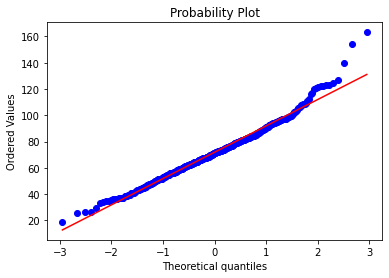

In [4]:
import pylab 
import scipy.stats as stats

stats.probplot(gen_hi['Lung Cancer'], dist="norm", plot=pylab) # Plotting the probability plot of incident rates of lung cancer vs genetic high risk variable 
pylab.show() #there appears to be some outliers at the end but for the most part it follows a straight line

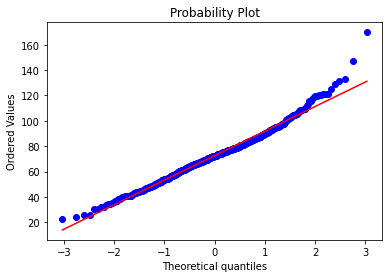

In [5]:
stats.probplot(gen_lo['Lung Cancer'], dist="norm", plot=pylab) # Plotting the probability plot of incident rates of lung cancer vs genetic low risk
pylab.show()

## (4) Calculating the mean values and F-statistic 

In [6]:
mean_hi = gen_hi['Lung Cancer'].mean() # Calculating the mean of incident rates of lung cancer where there is high genetic risk
mean_lo = gen_lo['Lung Cancer'].mean() # Calculating the mean of incident rates of lung cancer where there is low genetic risk
print(mean_hi, mean_lo) # Printing the mean of incident rates of lung cancer where there is high genetic risk and low genetic risk

71.88574712643677 72.58637168141593


In [7]:
difference_hi= gen_hi['Lung Cancer'] - mean_hi #note that subtracting a scalar from a vector works because of broadcasting
difference_lo = gen_lo['Lung Cancer'] - mean_lo 
# next two lines is calculating var hat
var_hi = np.dot(difference_hi,difference_hi)/(gen_hi.shape[0]-1) # Calculating the variance of incident rates of lung cancer where there is high genetic risk
var_lo = np.dot(difference_lo,difference_lo)/(gen_lo.shape[0]-1) # Calculating the variance of incident rates of lung cancer where there is low genetic risk
F_stat = var_hi/var_lo # since under null hypothesis variance of two groups are equal so the variances would cancel out
print(var_hi, var_lo , F_stat) 

407.55716965940996 379.0483777694094 1.0752114863484354


## (5) Calculating the p-value and t-statistic for distribution

In [8]:
import scipy.stats

#calculating the  P value
# to find degrees of freedom of F distribution 
dfhi = difference_hi.shape[0]-1 
dflo = difference_lo.shape[0]-1

p_value = scipy.stats.f.cdf(F_stat, dfhi, dflo) # calculating p-value from other calculated values like F_statistic , dfhi and dflo
p_value # printing the calculated p-value 

0.7903833203340546

In [9]:
from scipy.stats import ttest_ind
high = gen_hi['Lung Cancer']
low = gen_lo['Lung Cancer']

stats.ttest_ind(high, low)   # printing the final values of t-statistic calculated and p-value calculated.

Ttest_indResult(statistic=-0.5551601481259969, pvalue=0.5789095321885536)